#  🩺 Pima Indians Diabetes Prediction

In this notebook, we will analyze and model the Pima Indians Diabetes dataset using classical supervised learning techniques and ensemble models like Random Forest, AdaBoost, and Gradient Boosting.

We aim to:
- Explore the dataset and fix any data quality issues
- Train baseline and ensemble models
- Compare performance using accuracy, classification report, and ROC AUC


In [3]:

import pandas as pd
import numpy as np


df = pd.read_csv("/content/diabetes (1).csv")


df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zero values")


Glucose: 5 zero values
BloodPressure: 35 zero values
SkinThickness: 227 zero values
Insulin: 374 zero values
BMI: 11 zero values


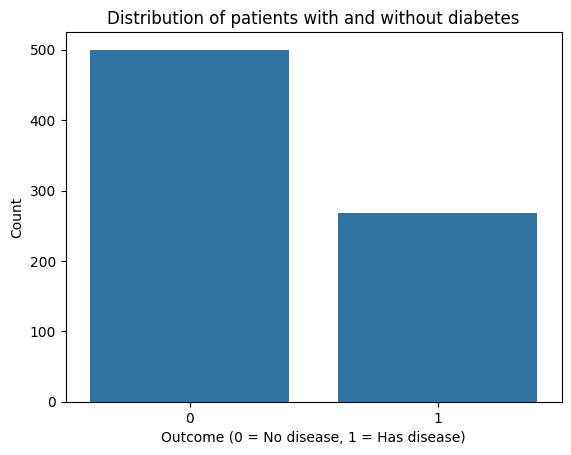

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title("Distribution of patients with and without diabetes")
plt.xlabel("Outcome (0 = No disease, 1 = Has disease)")
plt.ylabel("Count")
plt.show()


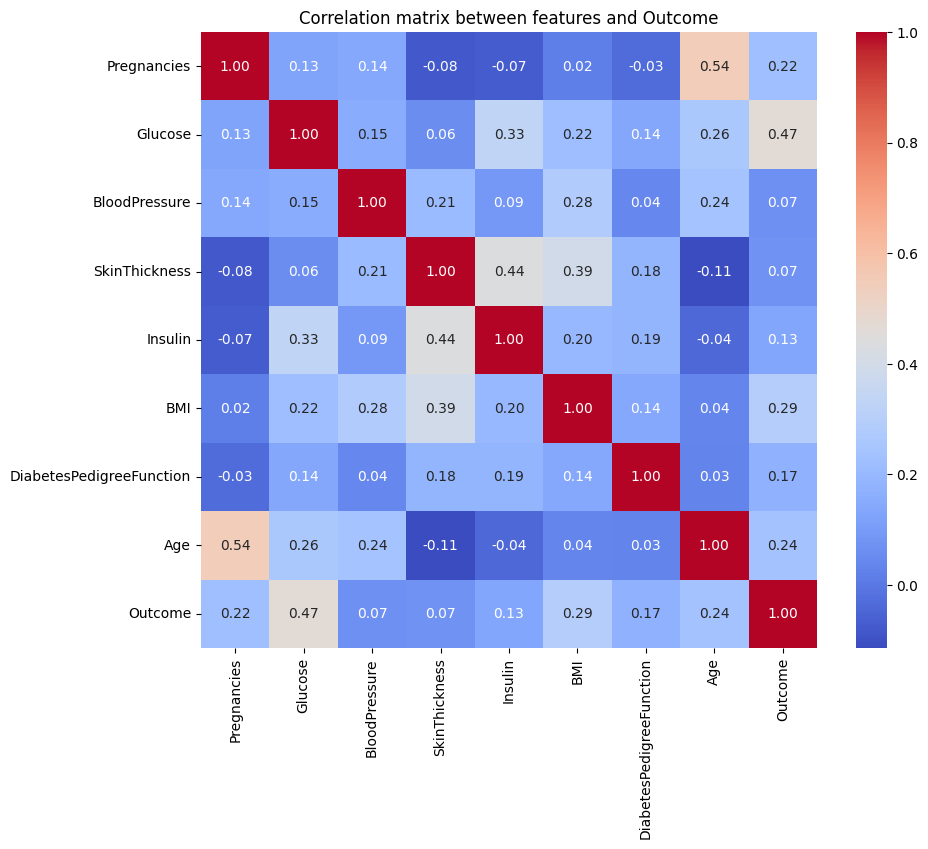

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix between features and Outcome")
plt.show()


## 🧹 Data Cleaning & Preprocessing

Before training our models, we need to clean the dataset by replacing biologically invalid zero values with more reasonable estimates (like the median). We also standardize the features to improve model convergence.


In [8]:
# Columns that should not have zero values
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with the median of the corresponding column
for col in cols_to_fix:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

# Check again
(df[cols_to_fix] == 0).sum()


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame (re-attach column names)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

y_train.head()

,Outcome
353,0
711,0
373,0
46,0
682,0


## 🤖 Model Training & Evaluation

We will train both basic and ensemble models to predict diabetes. Evaluation will be done using accuracy and classification metrics on the test set.


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Logistic Regression:")
evaluate_model(lr, X_test, y_test)


Logistic Regression:
Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
 [[82 18]
 [27 27]]


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree:")
evaluate_model(dt, X_test, y_test)


Decision Tree:
Accuracy: 0.6688311688311688

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.53      0.44      0.48        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154

Confusion Matrix:
 [[79 21]
 [30 24]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors:")
evaluate_model(knn, X_test, y_test)


K-Nearest Neighbors:
Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
 [[81 19]
 [26 28]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Random Forest:")
evaluate_model(rf, X_test, y_test)


Random Forest:
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

Confusion Matrix:
 [[85 15]
 [22 32]]


In [17]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)

print("AdaBoost:")
evaluate_model(ab, X_test, y_test)

AdaBoost:
Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix:
 [[84 16]
 [23 31]]


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

print("Gradient Boosting:")
evaluate_model(gb, X_test, y_test)


Gradient Boosting:
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

Confusion Matrix:
 [[85 15]
 [22 32]]


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

print("XGBoost:")
evaluate_model(xgb, X_test, y_test)


XGBoost:
Accuracy: 0.7727272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[86 14]
 [21 33]]


In [19]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'
)

voting.fit(X_train, y_train)

print("Voting Classifier:")
evaluate_model(voting, X_test, y_test)


Voting Classifier:
Accuracy: 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

Confusion Matrix:
 [[83 17]
 [23 31]]
